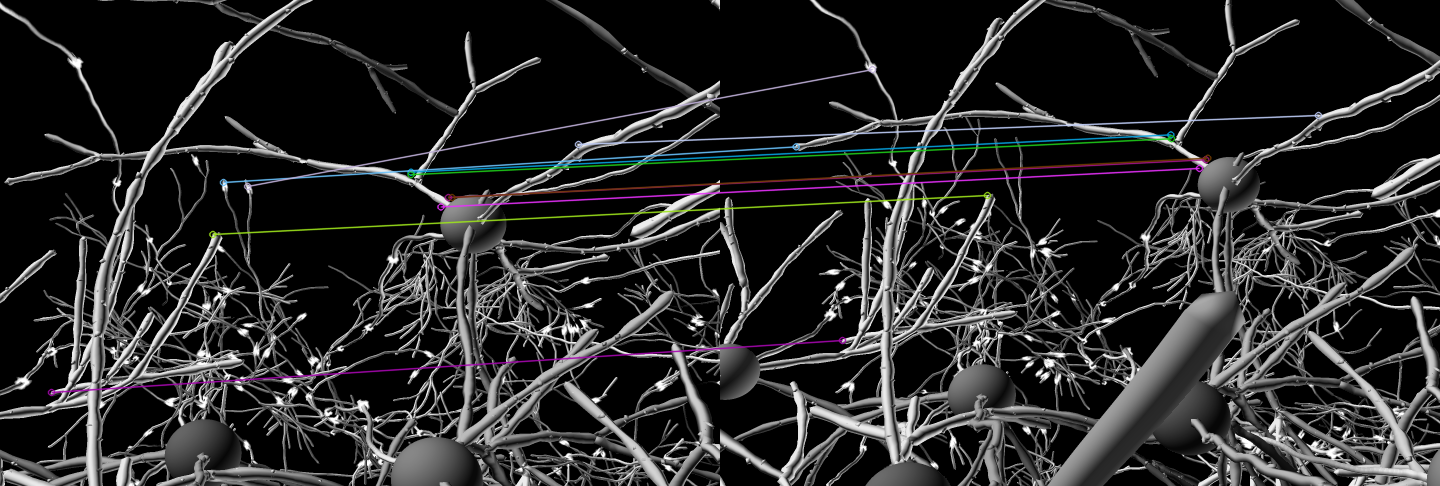

Predicted: [450.38602 134.36931] | Measured: [267. 195.]
Predicted: [450.40414 134.48204] | Measured: [451.00806 138.24002]
Predicted: [454.2125  137.19138] | Measured: [485.2225  159.25252]
Predicted: [370.41388 189.61644] | Measured: [122. 340.]
Predicted: [441.61658 173.9092 ] | Measured: [598. 115.]
Predicted: [254.57384 166.7699 ] | Measured: [ 75.600006 146.40001 ]
Predicted: [341.99985 165.29662] | Measured: [487.31274 157.66   ]
Predicted: [218.42526  112.252396] | Measured: [152.06401  69.12001]
Predicted: [331.9417  134.97354] | Measured: [479.00168 167.96162]
Predicted: [371.53598 256.2623 ] | Measured: [409. 348.]
Predicted: [245.16696 169.5246 ] | Measured: [147.22562  66.35521]
Predicted: [350.32693 154.35486] | Measured: [465.81363 143.32727]
Predicted: [411.52145 138.43703] | Measured: [447.89774 132.57773]
Predicted: [458.02737 133.63054] | Measured: [462.82764 140.34128]
Predicted: [492.53812 149.41997] | Measured: [477.75757 170.20114]
Predicted: [318.77338  98.37207

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow from google.colab.patches

# Load two images
img1 = cv2.imread('brain_492.tif', cv2.IMREAD_GRAYSCALE)  # First image
img2 = cv2.imread('brain_508.tif', cv2.IMREAD_GRAYSCALE)  # Second image

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Use BFMatcher to match the descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches based on their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 10 matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matched features
cv2_imshow(img_matches) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

# Initialize a simple Kalman filter for tracking
kalman = cv2.KalmanFilter(4, 2)  # 4 dynamic, 2 measurement states
kalman.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)
kalman.transitionMatrix = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)
kalman.processNoiseCov = np.eye(4, dtype=np.float32) * 0.03

# Assume first matched keypoint's coordinates as the initial position
initial_match = matches[0].trainIdx
x, y = kp2[initial_match].pt
kalman.statePre = np.array([[x], [y], [0], [0]], dtype=np.float32)

# Simulating measurement update from keypoints in next image
for i in range(1, len(matches)):
    measurement = np.array([[np.float32(kp2[matches[i].trainIdx].pt[0])],
                            [np.float32(kp2[matches[i].trainIdx].pt[1])]])

    kalman.correct(measurement)  # Kalman filter correction
    prediction = kalman.predict()  # Predict next position

    print(f"Predicted: {prediction[:2].ravel()} | Measured: {measurement.ravel()}")

cv2.destroyAllWindows()

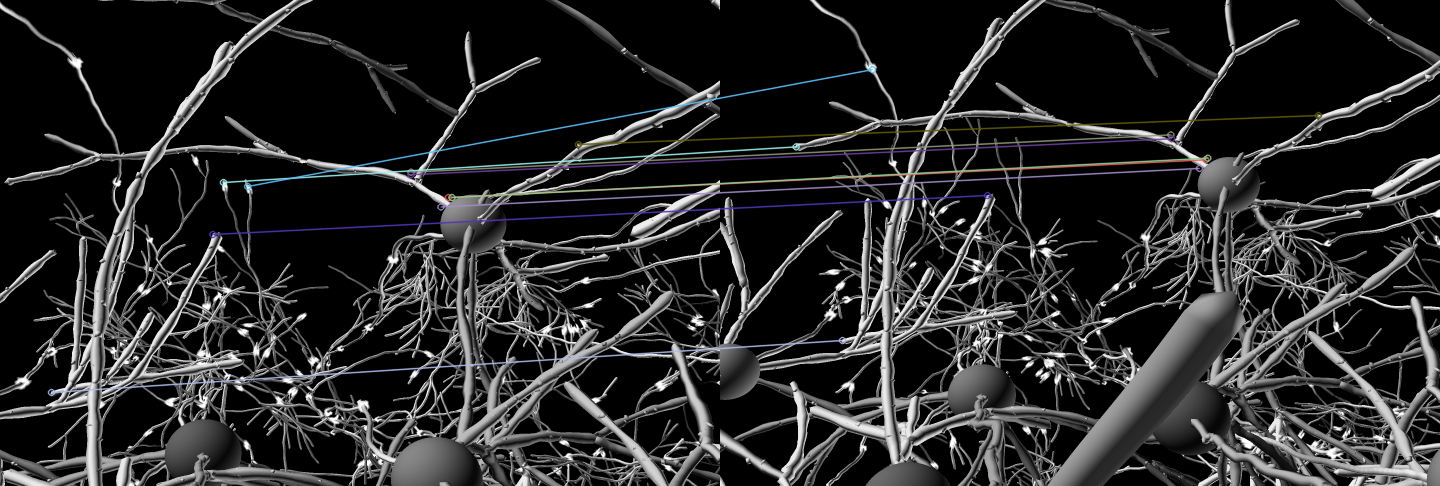

In [ ]:
# prompt: give me the visualization with two input images

import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow from google.colab.patches

# Load two images
img1 = cv2.imread('brain_492.tif', cv2.IMREAD_GRAYSCALE)  # First image
img2 = cv2.imread('brain_508.tif', cv2.IMREAD_GRAYSCALE)  # Second image

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Use BFMatcher to match the descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches based on their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 10 matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matched features
cv2_imshow(img_matches) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()


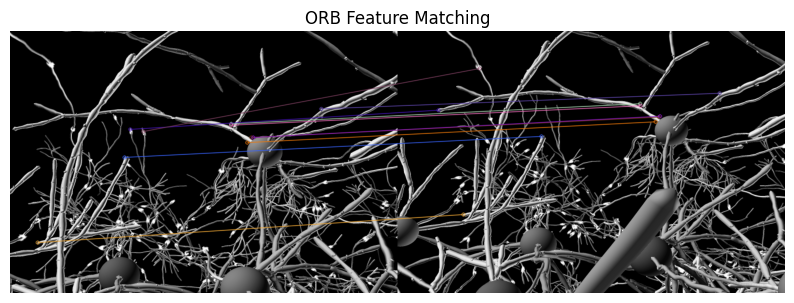

In [ ]:
# prompt: give it as MATPLOT LIB PLOT AND I NEED TO CLEARLY SHOW THE MATCHING POINTS

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images
img1 = cv2.imread('brain_492.tif', cv2.IMREAD_GRAYSCALE)  # First image
img2 = cv2.imread('brain_508.tif', cv2.IMREAD_GRAYSCALE)  # Second image

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Use BFMatcher to match the descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches based on their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 10 matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert the image to RGB for matplotlib
img_matches_rgb = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)

# Display the matches using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(img_matches_rgb)
plt.title('ORB Feature Matching')
plt.axis('off')
plt.show()


In [ ]:
# prompt: more clearly visualize

import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow from google.colab.patches

# Load two images
img1 = cv2.imread('brain_492.tif', cv2.IMREAD_GRAYSCALE)  # First image
img2 = cv2.imread('brain_508.tif', cv2.IMREAD_GRAYSCALE)  # Second image

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Use BFMatcher to match the descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches based on their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 50 matches with larger circles and lines
img_matches = cv2.drawMatches(
    img1,
    kp1,
    img2,
    kp2,
    matches[:50],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
    matchColor=(0, 255, 0),  # Green color for matches
singlePointColor=(255, 0, 0),  # Blue color for keypoints
    matchesMask=None,
    flags=cv2.DrawMatchesFlags_DEFAULT
)
# Increase the size of the keypoint circles
for match in matches[:50]:
  # Get the coordinates of the keypoints
  x1, y1 = kp1[match.queryIdx].pt
  x2, y2 = kp2[match.trainIdx].pt

  # Draw larger circles at the keypoint locations
  cv2.circle(img_matches, (int(x1), int(y1)), 5, (0, 0, 255), 2)  # Red circles
  cv2.circle(img_matches, (int(x2) + img1.shape[1], int(y2)), 5, (0, 0, 255), 2)  # Red circles

  # Draw thicker lines between matches
  cv2.line(
      img_matches,
      (int(x1), int(y1)),
      (int(x2) + img1.shape[1], int(y2)),
      (0, 255, 0),
      2,
  )  # Green lines

# Display matched features
cv2_imshow(img_matches)  # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

# Initialize a simple Kalman filter for tracking
kalman = cv2.KalmanFilter(4, 2)  # 4 dynamic, 2 measurement states
kalman.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)
kalman.transitionMatrix = np.array(
    [[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32
)
kalman.processNoiseCov = np.eye(4, dtype=np.float32) * 0.03

# Assume first matched keypoint's coordinates as the initial position
initial_match = matches[0].trainIdx
x, y = kp2[initial_match].pt
kalman.statePre = np.array([[x], [y], [0], [0]], dtype=np.float32)

# Simulating measurement update from keypoints in next image
for i in range(1, len(matches)):
    measurement = np.array(
        [[np.float32(kp2[matches[i].trainIdx].pt[0])],
         [np.float32(kp2[matches[i].trainIdx].pt[1])]]
    )

    kalman.correct(measurement)  # Kalman filter correction
    prediction = kalman.predict()  # Predict next position

    print(f"Predicted: {prediction[:2].ravel()} | Measured: {measurement.ravel()}")

cv2.destroyAllWindows()


SyntaxError: keyword argument repeated: flags (<ipython-input-7-cd1f4f648b1c>, line 37)

In [1]:
import cv2
import numpy as np
from google.colab import files

# Upload the image
uploaded = files.upload()

# Read the uploaded image
image = cv2.imread(next(iter(uploaded)))

# Get the dimensions of the image
height, width, _ = image.shape

# Divide the image into two halves
left_half = image[:, :width // 2]
right_half = image[:, width // 2:]

# Save the two halves
cv2.imwrite('left_half.jpg', left_half)
cv2.imwrite('right_half.jpg', right_half)

# Download the saved images
files.download('left_half.jpg')
files.download('right_half.jpg')


Saving download (1).jpeg to download (1).jpeg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import cv2
import numpy as np

# Load the images
img1 = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)  # Query image
img2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)  # Train image

# Initialize SURF detector
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)

# Find keypoints and descriptors
keypoints1, descriptors1 = surf.detectAndCompute(img1, None)
keypoints2, descriptors2 = surf.detectAndCompute(img2, None)

# Create a BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2)

# Match descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the result
cv2.imshow('SURF Feature Matching', img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.10.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'
